# Exploratory Data Analysis

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>    
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [head](#section301)<br/>
    - 3.2 [info](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [mileage outliers](#section304)<br/>
    - 3.5 [engV outliers](#section305)<br/>
    - 3.6 [null values](#section306)<br/>
    - 3.7 [Observations](#section307)<br/>
    - 3.8 [Profile Report](#section308)<br/>
    - 3.9 [Final Observations](#section309)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Missing data and its imputation](#section401)<br/>
- 5. [Data Analysis](#section5)</br>
- 6. [Conclusion](#section6)<br/>

<a id=section1></a>
## 1. Problem Statement

This dataset is the collection of all the __sales that were made by a car dealer from 1953 to 2016__.

<a id=section101></a>
### Introduction

    In this exploratory data analysis we are trying to analyze the sales data and find interesting correlations between various features of the car.

<a id=section2></a>
## 2. Loading the required Packages and Data

In [14]:
import numpy as np
import pandas as pd
import pandas_profiling as pdpf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [15]:
#First tried to consume the file directly from github. But was not able to as i was getting encoding issue
#carsales_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='utf-16')

# Had to create a local copy by copying the data and saving the file in unicode encoding did the trick. 
# Will attach this file also for project evaluation.
carsales_data = pd.read_csv('C:/Code/ud120-projects-master/ud120-projects-master/final_project/car_sales_unicode.csv', encoding='utf-16')

<a id=section3></a>
### 3. Data Profiling

Review the datatypes of the various columns and view sample data to get more understanding on what type of data we are dealing with.

In [16]:
<a id=section301></a> 
carsales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [17]:
<a id=section302></a> 
carsales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [18]:
<a id=section303></a> 
carsales_data.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,863,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [19]:
<a id=section304></a> 
carsales_data[carsales_data['mileage']>900]

,car,price,body,mileage,engV,engType,registration,year,model,drive
334,Toyota,36000.0,crossover,940,NaN,Other,yes,2009,Land Cruiser 200,NaN
2602,Mercedes-Benz,68700.0,crossover,980,3.0,Diesel,yes,2013,GL 350,full
4572,Kia,7150.0,hatch,920,1.4,Petrol,yes,2008,Ceed,front
6857,VAZ,750.0,sedan,999,1.3,Petrol,yes,1984,2106,rear
7845,Fiat,4000.0,van,999,2.5,Diesel,yes,1998,Ducato ����.,front
7970,ZAZ,1600.0,sedan,930,1.2,Gas,yes,2006,1103 �������,front


In [20]:
<a id=section305></a> 
carsales_data[carsales_data['engV']>90].count()

car             28
price           28
body            28
mileage         28
engV            28
engType         28
registration    28
year            28
model           28
drive           22
dtype: int64

In [21]:
<a id=section306></a> 
carsales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

<a id=section307></a>
#### Observations

    From the sample data and with the help of describe and info functions we can infer that mileage column and engV column seem to have outliers with very extereme values of 999 and 99. 
    I checked to see how many columns were getting affected and came to the conclusion that the number of rows affected is quite less(5 and 28 compared to a total of 9576 rows) also there is not much difference between these value and other values. 
    Hence i have decided to take no action. Though they seem to be outliers didn't think they are outliers.

In [22]:
<a id=section308></a> 
carsales_data_final = carsales_data[carsales_data.drive.notnull()]
pdpf.ProfileReport(carsales_data)

Number of variables,10
Number of observations,9576
Total Missing (%),1.0%
Total size in memory,748.2 KiB
Average record size in memory,80.0 B
Numeric,4
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<a id=section309></a> 
### 3.9 Final Observations

- Summary of the various columns in this dataset
- <strong>car</strong>: (String Datatype) The company which manufactured the car. It has been noted that this column has high cardinality(87 distinct values)
- <strong>price</strong> (Int Datatype) The price for which the car was sold. There are 267 rows with the price as zero. Assumption done here is that these were given to charity. 
- <strong>body</strong>: (String Datatype) The body type of the car sold. Sedan seems to be the maximum occuring value.
- <strong>mileage</strong>: (Int Datatype) Number of miles that the car has been run for till now. The value in this column could be in thousand multiplers. There were some cars sold with mileage of zero indicating that the dealership sells new vehicles along with old ones. Also the outliers >900 are only 5 in number also there are other value surrounding it which inclines us more to think that these could not be outliers.
- <strong>engV</strong>: (Float Datatype) The engine volume. There are 434 null values in this column which i am thinking of replacing with the median of the data.
- <strong>engType</strong>: (String datatype) The fuel type consumed by the engine. This nominal value has only 4 distinct values petrol, gas, diesel and other. 
- <strong>registration</strong>: (boolean Datatype) Just Indicates whether the vehicle was registered or not. Doesn't seem to add much value to the data will be dropping this column.
- <strong>year</strong>: (int Datatype) The year in which the car was sold.Values range from 1953 to 2016.
- <strong>model</strong>: (String Datatype) The model name under the brand lister as car. We are going to drop this column as well as it has very high cardinality(888 unique values)
- <strong>drive</strong>: ( String Datatype) Drive type of the vehicle. Only 4 possible values. There are 511 missing values and we are thinking of replacing these values with the mode of the data as this is categorical data. 

<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a> 
### 4.1 Missing Data and its imputation

In [23]:
drivemode_mode = carsales_data.drive.mode()

In [24]:
engV_median = carsales_data.engV.median()

In [25]:
carsales_data.drop_duplicates(keep='first', inplace = True)

In [26]:
carsales_data.drive.fillna(drivemode_mode, inplace = True)

In [27]:
carsales_data.engV.fillna(engV_median, inplace = True)

In [28]:
carsales_data_final = carsales_data[carsales_data.drive.notnull()]

<a id=section5></a> 
### 5. Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


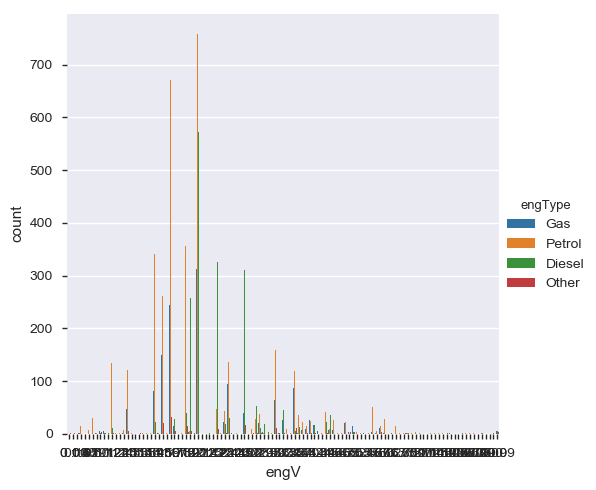

In [29]:
sns.factorplot('engV', hue='engType', kind='count', data = carsales_data_final  )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


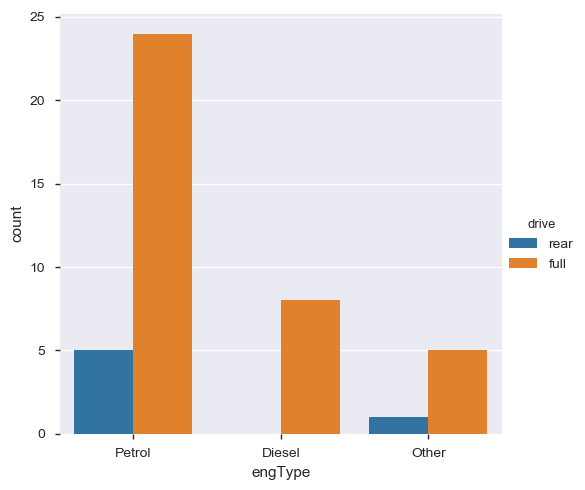

In [30]:
luxury = carsales_data[carsales_data['price']>150000]
#luxury.car.value_counts().plot.pie(autopct='%1.1f%%',subplots=True)
#luxury
sns.factorplot('engType', hue='drive', kind='count', data=luxury);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD9990E3C8>],
      dtype=object)

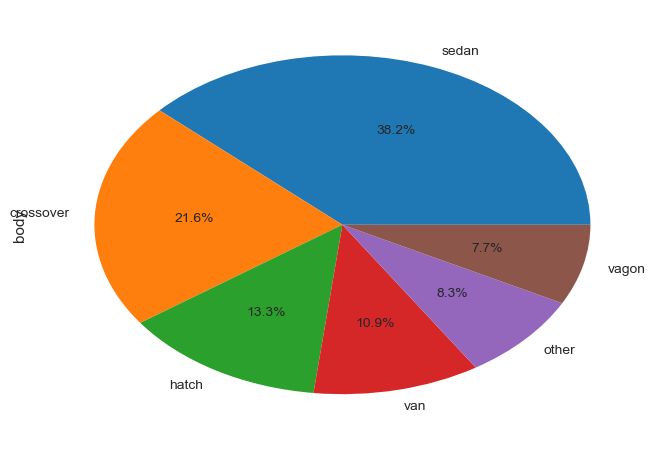

In [31]:
#sns.countplot(y='body', data = carsales_data_final, orient='v', order = carsales_data_final.body.value_counts().index).set_title('countplot for body types')
#carsales_data_final['body'].apply(pd.value_counts).plot.pie(subplots=True)
#plt.show()
carsales_data_final.body.value_counts().plot.pie(autopct='%1.1f%%',subplots=True)

In [32]:
carsales_data_final[carsales_data_final['body'] == 'sedan'].count()

car             3420
price           3420
body            3420
mileage         3420
engV            3420
engType         3420
registration    3420
year            3420
model           3420
drive           3420
dtype: int64

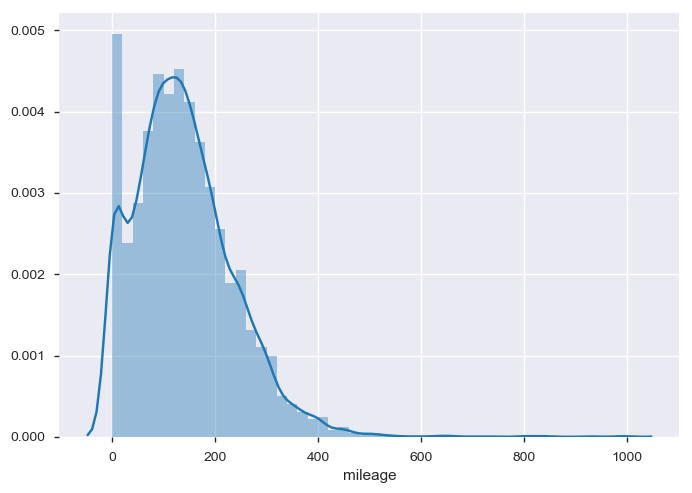

In [33]:
sns.distplot(carsales_data_final.mileage)

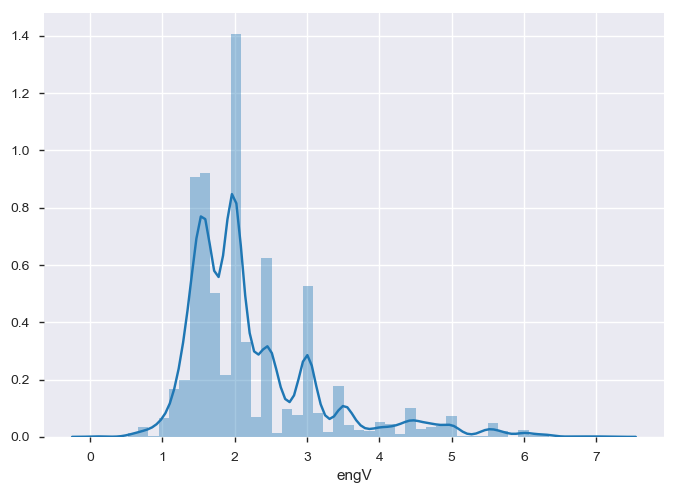

In [34]:
sns.distplot(carsales_data_final[carsales_data_final.engV<8].engV ,)

Text(0.5,1,'countplot for number of cars sold per year sold')

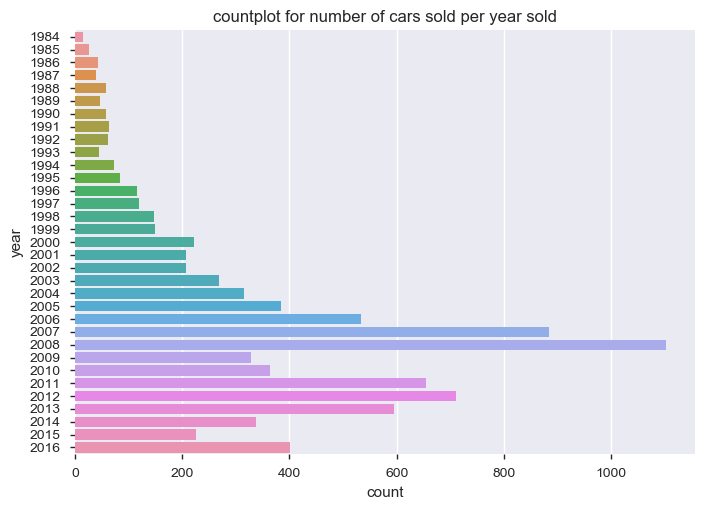

In [35]:
sns.countplot(y='year',data = carsales_data_final.groupby('year').filter(lambda x: len(x)>10),orient='v').set_title('countplot for number of cars sold per year sold')

Text(0.5,1,'countplot for number of cars sold per year')

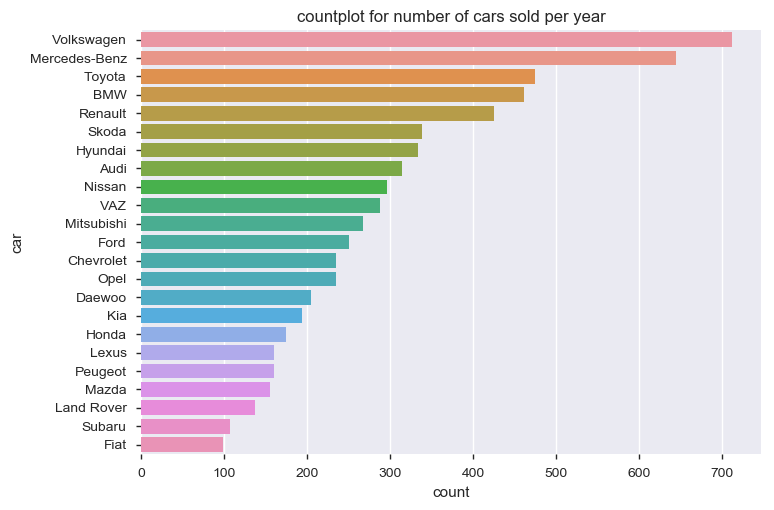

In [36]:
cars = carsales_data_final.groupby('car').filter(lambda x: len(x)>100)
cars1 = cars[cars.year>2000]
#sns.factorplot(y='car', hue='engType', kind='count', data=cars1);
sns.countplot(y='car',data = cars1, order = cars1.car.value_counts().index).set_title('countplot for number of cars sold per year')

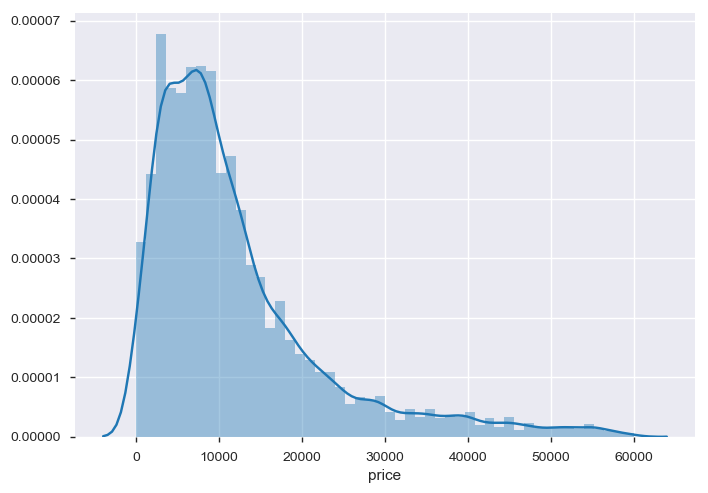

In [37]:
sns.distplot(carsales_data_final[carsales_data_final.price<60000].price)

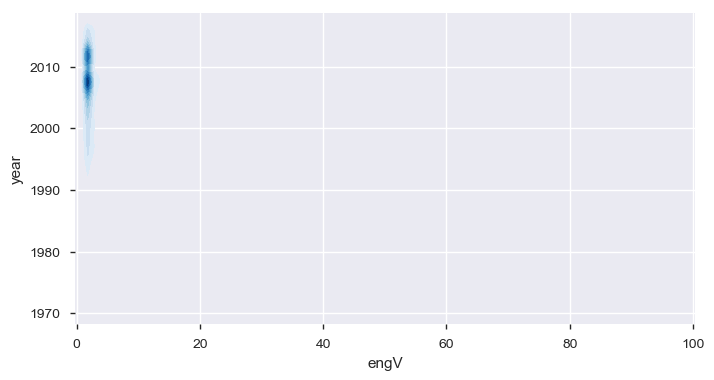

In [38]:
#cars = carsales_data_final[carsales_data_final.engV<8].groupby('year').filter(lambda x: len(x)>50)
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(cars.engV, cars.year,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(cars.engV, cars.year,
                 cmap="Blues", shade=True, shade_lowest=False)


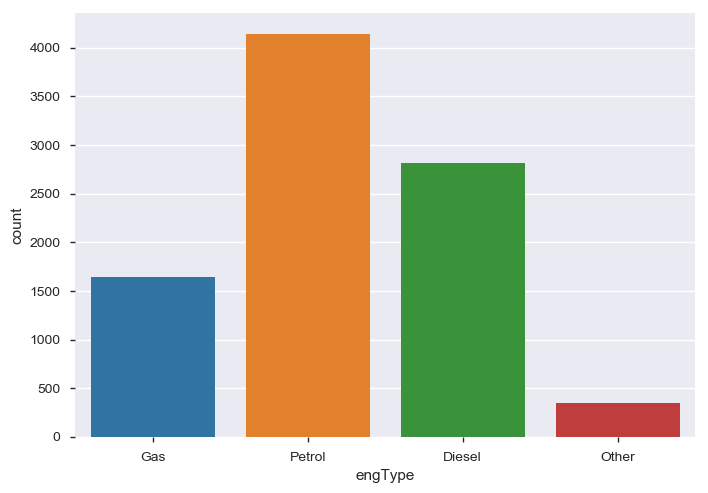

In [39]:
sns.countplot(x='engType', data = carsales_data_final)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


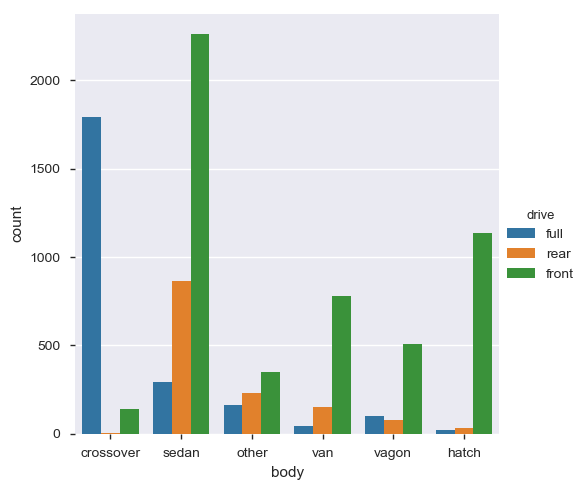

In [40]:
#sns.factorplot('body', hue='engType', kind='count', data=carsales_data_final);
sns.factorplot('body', hue='drive', kind='count', data=carsales_data_final);

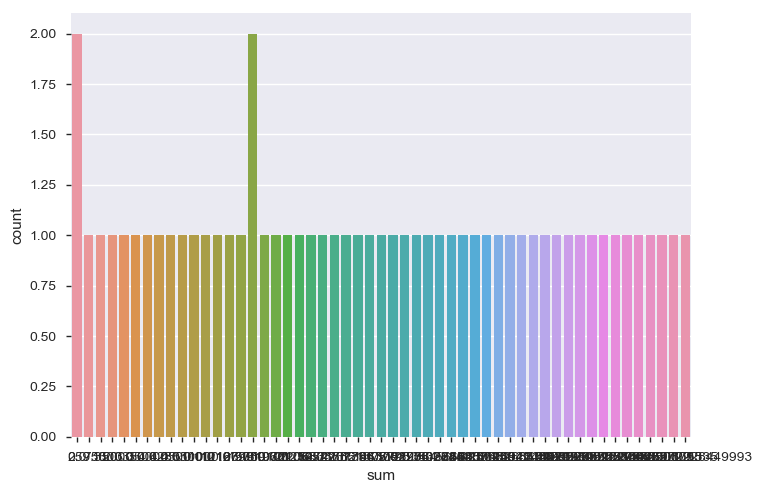

In [45]:
carsales_data_final.groupby(['year'])['price'].agg({'sum'}).reset_index()
sns.countplot(x='sum' ,data = carsales_data_final.groupby(['year'])['price'].agg({'sum'}).reset_index())

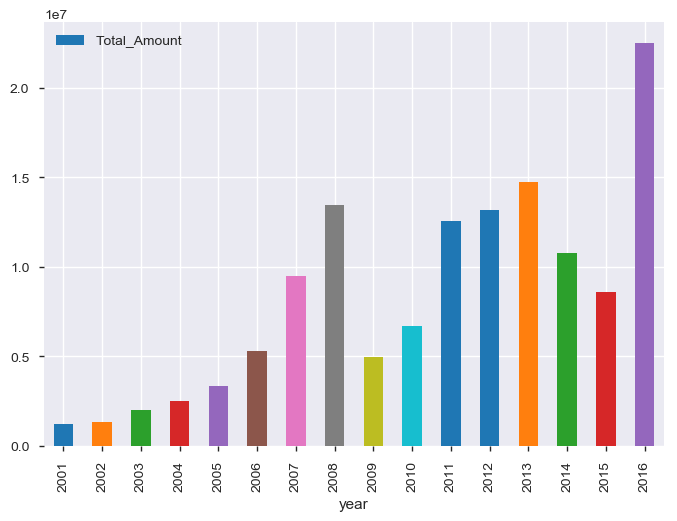

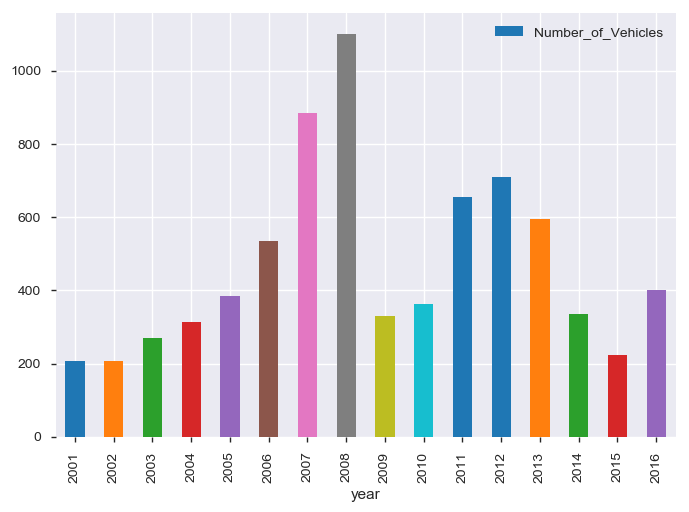

In [46]:
cars = carsales_data_final[carsales_data_final['year']>2000].groupby('year').agg({'price':['sum', 'count']}).reset_index()
cars.columns = ['year', 'Total_Amount', 'Number_of_Vehicles']
cars['stdamt'] = cars['Total_Amount']/10000
cars.plot(x='year',y = 'Total_Amount', kind = 'bar')
cars.plot(x='year', y = 'Number_of_Vehicles', kind='bar')
#f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")
#ax = sns.kdeplot(cars.Total_Amount, cars.year,
#                 cmap="Reds", shade=True, shade_lowest=False)
#ax = sns.kdeplot(cars.Number_of_Vehicles, cars.year,
#                 cmap="Blues", shade=True, shade_lowest=False)

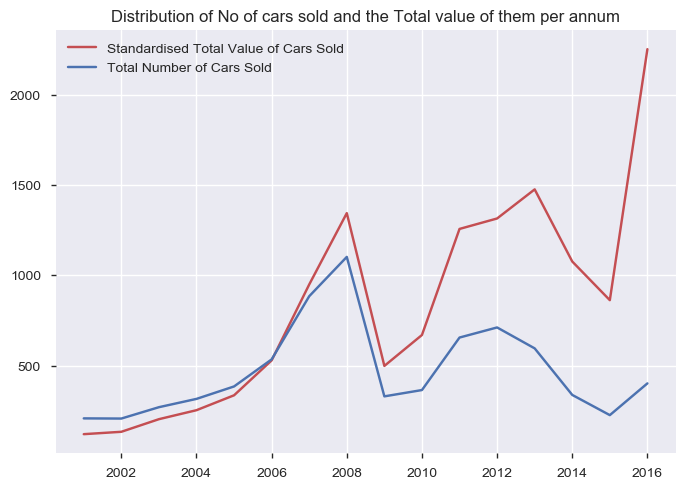

In [47]:
line1, = plt.plot(cars.year,cars.stdamt, 'r', label = 'line 1')
line2, = plt.plot(cars.year,cars.Number_of_Vehicles, 'b', label = 'line 2')

plt.legend([line1, line2],['Standardised Total Value of Cars Sold','Total Number of Cars Sold'])
plt.title('Distribution of No of cars sold and the Total value of them per annum')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


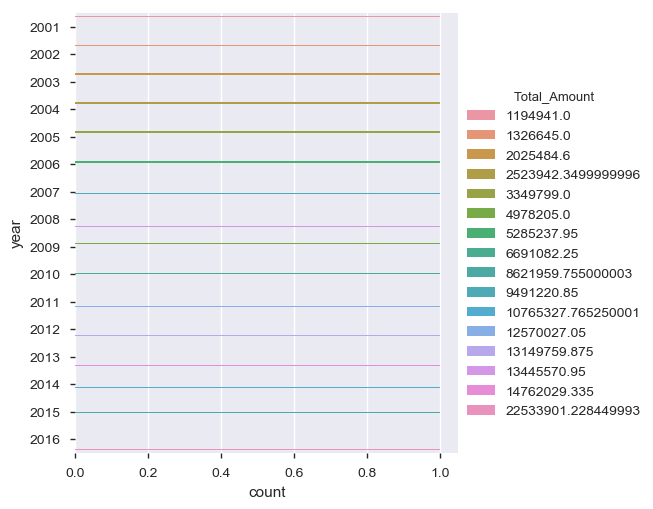

In [49]:
sns.factorplot(y='year', hue='Total_Amount', kind='count', data=cars);

<a id=section6></a> 
### 6. Conclusions
 - From this exercise we conclude that petrol powered cars are sold the maximum.
 - Sedan body type cars are the highest sold. 
 - The per unit cost of car has gone up which could mean either people purchase power has increased or due to government  regulations manufacturers have to include more safety features in the car.
 - Mercedes-Benz still remains the epitome of luxury with every 1 of 2 luxury cars being sold a Mercedes.